In [119]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo Análisis Discriminante lineal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
dfprostate = pd.read_csv("/Machine Learning/Data/prostate_cancer.csv")
#se muestra el dataframe
dfprostate.head()


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


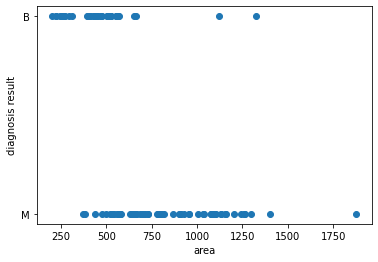

In [120]:
#Se visualiza en una gráfico que muestra los pacientes con tumores benignos y malignos 
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('diagnosis result')
plott.xlabel('area')
plott.scatter(dfprostate['area'],dfprostate['diagnosis_result'])

In [121]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfprostate.columns=dfprostate.columns.str.strip()

In [122]:
#Se reemplazará el valor del diagnóstico , donde 0 corresponde Maligno y 1 a Benigno
dfprostate=dfprostate.replace(to_replace ="M", value ="0")
dfprostate=dfprostate.replace(to_replace ="B", value ="1")

In [123]:
#Se visualizan el número pruebas tanto malignas como benignas 
dfprostate['diagnosis_result'].value_counts()

0    62
1    38
Name: diagnosis_result, dtype: int64

In [124]:
#Permite viusalizar información del dataframe
dfprostate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.5+ KB


In [127]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dfprostate.drop('diagnosis_result', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dfprostate.drop('id', axis='columns')

mytarget_y=dfprostate['diagnosis_result']

In [96]:
#Variables independientes
inputs_X.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [128]:
#A continuación se introducirán los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_X, mytarget_y, test_size = 0.2, random_state = 30)

In [129]:
#Visualiza los datos de entrenamiento y el número de variables involucradas 
X_train.shape, X_test.shape

((80, 9), (20, 9))

In [130]:
#Al modelo se le pasan los parámetros de entrenamiento
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)


LinearDiscriminantAnalysis()

In [131]:
#Visualiza el porcentaje de precisión del modelo
model.score(X_test,y_test)

0.75

In [132]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array(['0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0'], dtype='<U1')

In [133]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[8, 1],
       [4, 7]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

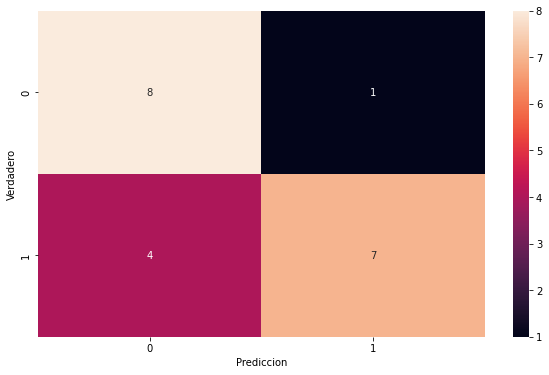

In [134]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [135]:
# Se discrimina las métricas de la matriz de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8 1]
 [4 7]]

True Positives(TP) =  8

True Negatives(TN) =  7

False Positives(FP) =  1

False Negatives(FN) =  4


In [153]:
#Se imprime las métricas del reporte de clasificación, de acuerdo a los datos de prueba y de predicción
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.25      0.18      0.21        11

    accuracy                           0.25        20
   macro avg       0.25      0.26      0.25        20
weighted avg       0.25      0.25      0.24        20



In [154]:
#Se cargan los valores de la matriz en variables para hacer los cálculos 
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [155]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2500


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8889


In [157]:
# print sensitivy model
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6667


In [158]:
# print True Positive Rate
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6667


In [159]:
# print False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1250


In [160]:
# print the Specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8750


In [136]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [137]:
#Se devide en 5 folder para realizar la validación cruzada
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [138]:
#Está función permite calcular el nivel de precisión del modelo, de acuerdo a los parámetros de entrenamiento y de prueba
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [139]:
#Visualiza la precisión del modelo 
get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test)

0.75

In [140]:
#Estás líneas permiten hacer la validación dividendo los datos en 5 plieges, estos datos se almacenan en vector
from sklearn import preprocessing

lda_score = []

for train_index,test_index in kf.split(inputs_X):
    X_train,X_test=inputs_X.iloc[train_index,:],inputs_X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=mytarget_y[train_index],mytarget_y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
   

In [141]:
#Muestra el resultado obtenido en cada división de los pliegues 
lda_score

[0.8, 0.85, 0.8, 1.0, 0.75]

In [142]:
#La invocación de la validación cruzada permite visualizar el score de los pliegues 
from sklearn.model_selection import cross_val_score
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([0.6875, 0.9375, 0.8125, 0.875 , 0.9375])

array([[<AxesSubplot:title={'center':'radius'}>,
        <AxesSubplot:title={'center':'texture'}>,
        <AxesSubplot:title={'center':'perimeter'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'smoothness'}>,
        <AxesSubplot:title={'center':'compactness'}>],
       [<AxesSubplot:title={'center':'symmetry'}>,
        <AxesSubplot:title={'center':'fractal_dimension'}>,
        <AxesSubplot:>]], dtype=object)

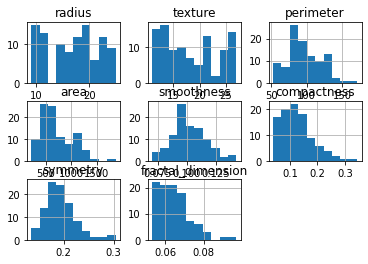

In [146]:
#Visualiza la distribución de cada variable 
%matplotlib inline
X_train=dfprostate.drop('id', axis='columns')
X_train.hist()

In [151]:
#Visualiza en modo texto la matriz de correlación 
import seaborn as sn
dfprostate_tmp=dfprostate.drop('id', axis='columns')
correlation_matrix= dfprostate_tmp.corr()
correlation_matrix = dfprostate_tmp.corr().round(2)
print(correlation_matrix)


                   radius  texture  perimeter  area  smoothness  compactness  \
radius               1.00     0.10      -0.24 -0.25       -0.13        -0.19   
texture              0.10     1.00      -0.11 -0.11        0.10         0.03   
perimeter           -0.24    -0.11       1.00  0.98        0.27         0.53   
area                -0.25    -0.11       0.98  1.00        0.21         0.42   
smoothness          -0.13     0.10       0.27  0.21        1.00         0.47   
compactness         -0.19     0.03       0.53  0.42        0.47         1.00   
symmetry            -0.04     0.08       0.20  0.11        0.42         0.68   
fractal_dimension   -0.03     0.14      -0.20 -0.27        0.37         0.65   

                   symmetry  fractal_dimension  
radius                -0.04              -0.03  
texture                0.08               0.14  
perimeter              0.20              -0.20  
area                   0.11              -0.27  
smoothness             0.42       

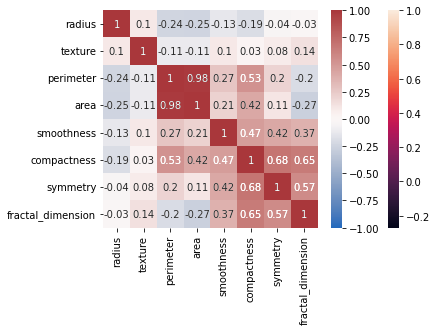

In [152]:
#Visualiza graficamente la matriz de correlación
sn.heatmap(correlation_matrix, annot=True)
sn.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
#sn.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
#plt.show()